# Predicting Graduation Rates from Colleges

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/drive/MyDrive/CollegeAnalytics/newcollege.csv")
data.head()

,basic,hbcu,flagship,awards_per_value,exp_award_value,ft_pct,aid_value,pell_value,retain_value,MAIN,...,AGE_ENTRY,FEMALE,MARRIED,DEPENDENT,FIRST_GEN,FAMINC,MD_FAMINC,FAMINC_IND,COUNT_NWNE_P10,D100_4
0,Bachelors,False,False,22.2,76919.0,81.3,11447.0,43.0,62.0,True,...,23.55,0.47,0.09,0.73,0.36,61407.00,42377.92,31147.17,30.0,214.0
1,Bachelors,False,False,14.5,112204.0,75.5,19910.0,47.9,59.7,True,...,22.78,NaN,0.09,0.74,0.38,43384.97,35466.25,22948.63,34.0,67.0
2,Masters,False,False,19.9,85883.0,94.6,13261.0,14.9,86.7,True,...,21.70,0.67,0.06,0.83,0.17,98204.78,76602.54,36448.25,90.0,644.0
3,Doctoral/Research Universities,False,False,20.6,80607.0,96.6,23604.0,31.0,85.0,True,...,20.19,0.63,0.02,0.92,0.25,85400.13,65168.37,14114.17,182.0,799.0
4,Research Universities,False,False,24.8,598908.0,100.0,29314.0,10.6,96.6,True,...,19.26,0.36,NaN,NaN,NaN,101723.57,94665.06,NaN,NaN,210.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1661 entries, 0 to 1660
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   basic             1661 non-null   object 
 1   hbcu              1661 non-null   bool   
 2   flagship          1661 non-null   bool   
 3   awards_per_value  1661 non-null   float64
 4   exp_award_value   1661 non-null   float64
 5   ft_pct            1658 non-null   float64
 6   aid_value         1661 non-null   float64
 7   pell_value        1661 non-null   float64
 8   retain_value      1613 non-null   float64
 9   MAIN              1661 non-null   bool   
 10  NUMBRANCH         1661 non-null   int64  
 11  PREDDEG           1661 non-null   object 
 12  CONTROL           1661 non-null   object 
 13  REGION            1661 non-null   object 
 14  ADM_RATE          1412 non-null   float64
 15  DISTANCEONLY      1661 non-null   bool   
 16  UGDS              1661 non-null   int64  


In [4]:
data.isnull().sum()

basic                 0
hbcu                  0
flagship              0
awards_per_value      0
exp_award_value       0
ft_pct                3
aid_value             0
pell_value            0
retain_value         48
MAIN                  0
NUMBRANCH             0
PREDDEG               0
CONTROL               0
REGION                0
ADM_RATE            249
DISTANCEONLY          0
UGDS                  0
UGDS_WHITE            0
UGDS_BLACK            0
UGDS_HISP             0
UGDS_ASIAN            0
UGDS_AIAN             0
UGDS_NHPI             0
UGDS_2MOR             0
UGDS_NRA              0
UGDS_UNKN             0
PPTUG_EF              0
COSTT4_A              6
TUITIONFEE_IN         9
TUITIONFEE_OUT        9
TUITFTE               0
INEXPFTE              0
AVGFACSAL            15
PFTFAC               50
PCTPELL               0
PFTFTUG1_EF          77
D200_4               60
RET_FT4              35
PCTFLOAN              0
INC_PCT_LO            1
DEP_STAT_PCT_IND     46
DEP_INC_AVG     

In [5]:
data.columns

Index(['basic', 'hbcu', 'flagship', 'awards_per_value', 'exp_award_value',
       'ft_pct', 'aid_value', 'pell_value', 'retain_value', 'MAIN',
       'NUMBRANCH', 'PREDDEG', 'CONTROL', 'REGION', 'ADM_RATE', 'DISTANCEONLY',
       'UGDS', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN',
       'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN',
       'PPTUG_EF', 'COSTT4_A', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'TUITFTE',
       'INEXPFTE', 'AVGFACSAL', 'PFTFAC', 'PCTPELL', 'PFTFTUG1_EF', 'D200_4',
       'RET_FT4', 'PCTFLOAN', 'INC_PCT_LO', 'DEP_STAT_PCT_IND', 'DEP_INC_AVG',
       'IND_INC_AVG', 'LOAN_EVER', 'PELL_EVER', 'AGE_ENTRY', 'FEMALE',
       'MARRIED', 'DEPENDENT', 'FIRST_GEN', 'FAMINC', 'MD_FAMINC',
       'FAMINC_IND', 'COUNT_NWNE_P10', 'D100_4'],
      dtype='object')

In [6]:
df = data[['basic', 'hbcu', 'flagship', 'awards_per_value', 'exp_award_value',
'ft_pct', 'aid_value', 'pell_value', 'retain_value', 'MAIN',
'NUMBRANCH', 'PREDDEG', 'CONTROL', 'REGION','DISTANCEONLY',
'UGDS', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN',
'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN',
'TUITIONFEE_OUT', 'TUITFTE','INEXPFTE', 'AVGFACSAL', 'PFTFAC', 
'PCTPELL', 'PFTFTUG1_EF', 'D200_4','RET_FT4', 'PCTFLOAN', 'INC_PCT_LO', 
'DEP_STAT_PCT_IND', 'DEP_INC_AVG','IND_INC_AVG', 'LOAN_EVER', 'PELL_EVER', 'AGE_ENTRY',
'FIRST_GEN', 'FAMINC', 'MD_FAMINC','FAMINC_IND']]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1661 entries, 0 to 1660
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   basic             1661 non-null   object 
 1   hbcu              1661 non-null   bool   
 2   flagship          1661 non-null   bool   
 3   awards_per_value  1661 non-null   float64
 4   exp_award_value   1661 non-null   float64
 5   ft_pct            1658 non-null   float64
 6   aid_value         1661 non-null   float64
 7   pell_value        1661 non-null   float64
 8   retain_value      1613 non-null   float64
 9   MAIN              1661 non-null   bool   
 10  NUMBRANCH         1661 non-null   int64  
 11  PREDDEG           1661 non-null   object 
 12  CONTROL           1661 non-null   object 
 13  REGION            1661 non-null   object 
 14  DISTANCEONLY      1661 non-null   bool   
 15  UGDS              1661 non-null   int64  
 16  UGDS_WHITE        1661 non-null   float64


In [8]:
df = df.dropna()

In [9]:
df.shape

(1408, 46)

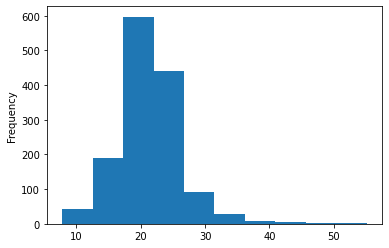

In [10]:
df.awards_per_value.plot.hist();

The histgram plot of awards_per_value shows the completion rate per 100 FTE students.  Most schools have completion rate ranging between 15% and 25%.  Very few schools have completion rate in excess of 40%.

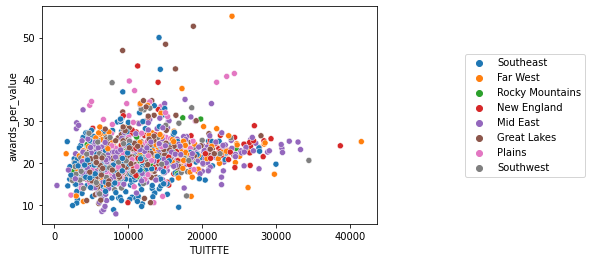

In [11]:
g = sns.scatterplot(x='TUITFTE',y='awards_per_value',data=df,hue='REGION')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);

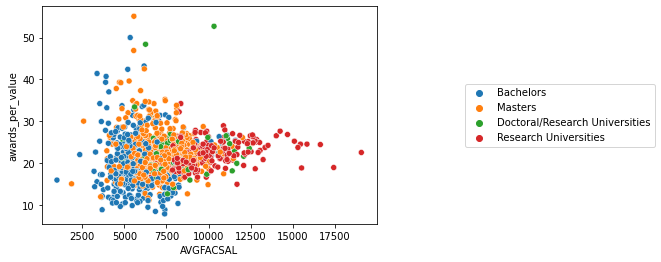

In [12]:
p = sns.scatterplot(x='AVGFACSAL',y='awards_per_value',data=df,hue='basic')
p.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);

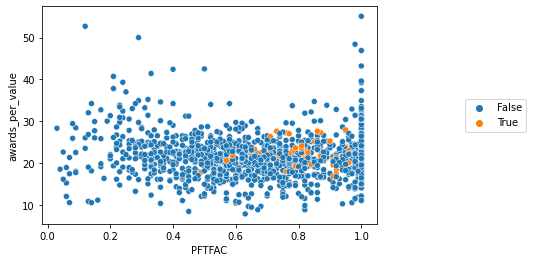

In [13]:
q = sns.scatterplot(x='PFTFAC',y='awards_per_value',data=df,hue='flagship')
q.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
awards_per_value,1408.0,21.420810,4.979801,7.80,18.6000,21.200,23.8000,55.10
exp_award_value,1408.0,78619.802557,49288.166283,0.00,51678.7500,67879.500,92634.7500,556675.00
ft_pct,1408.0,82.407386,15.858164,4.40,75.0000,87.350,93.9000,100.00
aid_value,1408.0,12058.303977,7084.092681,1606.00,6250.0000,10379.000,16172.0000,41580.00
pell_value,1408.0,38.779759,15.750470,6.20,27.2750,37.200,47.1250,100.00
retain_value,1408.0,73.439915,13.055197,0.00,66.5000,74.300,82.4000,100.00
NUMBRANCH,1408.0,1.854403,4.996456,1.00,1.0000,1.000,1.0000,141.00
UGDS,1408.0,5645.818892,7312.051502,152.00,1384.5000,2593.000,6608.7500,68874.00
UGDS_WHITE,1408.0,0.611499,0.232279,0.00,0.5000,0.670,0.7900,0.97
UGDS_BLACK,1408.0,0.148580,0.206717,0.00,0.0400,0.070,0.1600,1.00


In [51]:
X = df.drop(['awards_per_value', 'exp_award_value','retain_value','NUMBRANCH','UGDS','RET_FT4','D200_4','hbcu','ft_pct','pell_value','UGDS_BLACK'],axis=1)
y = df['awards_per_value']

In [17]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
#!pip install lazypredict

In [19]:
import lazypredict

In [20]:
from lazypredict.Supervised import LazyRegressor

In [21]:
reg = LazyRegressor(verbose=0,ignore_warnings=False,custom_metric=None)
models,predictions = reg.fit(X_train,X_test,y_train,y_test)
models

100%|██████████| 42/42 [00:27<00:00,  1.54it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.34,0.44,3.92,1.85
GradientBoostingRegressor,0.34,0.43,3.93,1.34
MLPRegressor,0.31,0.41,4.00,4.69
TransformedTargetRegressor,0.31,0.41,4.01,0.05
LinearRegression,0.31,0.41,4.01,0.08
Ridge,0.31,0.41,4.01,0.07
KernelRidge,0.31,0.41,4.01,0.27
RandomForestRegressor,0.30,0.40,4.03,3.64
LassoCV,0.30,0.40,4.04,1.08


In [53]:
X = pd.get_dummies(X,drop_first=True)

In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1408 entries, 0 to 1659
Data columns (total 45 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   flagship                              1408 non-null   bool   
 1   aid_value                             1408 non-null   float64
 2   MAIN                                  1408 non-null   bool   
 3   DISTANCEONLY                          1408 non-null   bool   
 4   UGDS_WHITE                            1408 non-null   float64
 5   UGDS_HISP                             1408 non-null   float64
 6   UGDS_ASIAN                            1408 non-null   float64
 7   UGDS_AIAN                             1408 non-null   float64
 8   UGDS_NHPI                             1408 non-null   float64
 9   UGDS_2MOR                             1408 non-null   float64
 10  UGDS_NRA                              1408 non-null   float64
 11  UGDS_UNKN        

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest,f_regression,VarianceThreshold

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline

In [56]:
pipe = Pipeline([("std",StandardScaler()),
                 ("var",VarianceThreshold()),
                 ("selector",SelectKBest()),
                 ("ext",ExtraTreesRegressor())])

params = [
          {"selector__k":[5,6,7,8,9,10,11,12]},
          {"ext":[ExtraTreesRegressor()],
           "ext__n_estimators":[10,100,200,500],
           "ext__max_features":['auto','sqrt','log2'],
           "ext__max_depth":[2,3,4,5,6,7]}
          ]

In [57]:
model = GridSearchCV(pipe,params,scoring='neg_mean_squared_error',cv=5)
results = model.fit(X_train,y_train)

In [58]:
best_est = results.best_estimator_
print(best_est)

Pipeline(steps=[('std', StandardScaler()), ('var', VarianceThreshold()),
                ('selector', SelectKBest()),
                ('ext', ExtraTreesRegressor(max_depth=7, n_estimators=200))])


In [59]:
y_pred = best_est.predict(X_train)

In [48]:
from sklearn.metrics import r2_score

In [60]:
r_square = r2_score(y_train,y_pred)
r_square

0.5874654306929434

In [61]:
# X.corr()

In [62]:
col_after_var = X_train.columns[best_est['var'].get_support()]
mask_sel = best_est['selector'].get_support(indices=True)
final_feature_cols = col_after_var[mask_sel]
final_feature_cols

Index(['MAIN', 'UGDS_UNKN', 'PCTPELL', 'INC_PCT_LO', 'DEP_STAT_PCT_IND',
       'DEP_INC_AVG', 'PELL_EVER', 'AGE_ENTRY', 'PREDDEG_Bachelors granting',
       'CONTROL_private for-profit'],
      dtype='object')

In [64]:
coef = results.best_estimator_.named_steps['ext'].feature_importances_
importance = np.abs(coef)
importance

array([0.05912065, 0.06105582, 0.11989526, 0.09008671, 0.14147829,
       0.11820206, 0.11766091, 0.20016414, 0.07357143, 0.01876471])

In [65]:
combination = pd.Series(importance,final_feature_cols)
combination

MAIN                         0.06
UGDS_UNKN                    0.06
PCTPELL                      0.12
INC_PCT_LO                   0.09
DEP_STAT_PCT_IND             0.14
DEP_INC_AVG                  0.12
PELL_EVER                    0.12
AGE_ENTRY                    0.20
PREDDEG_Bachelors granting   0.07
CONTROL_private for-profit   0.02
dtype: float64

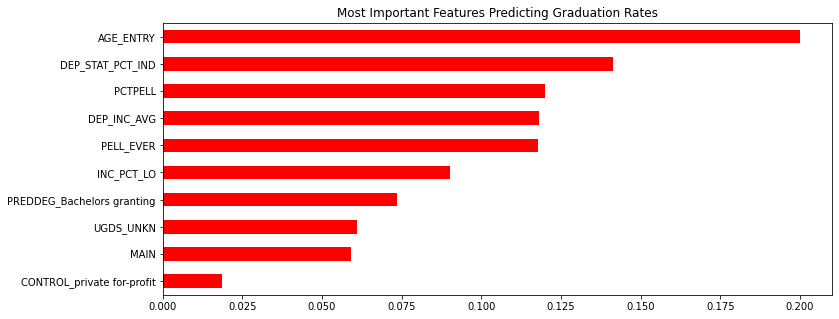

In [67]:
combination.sort_values().plot.barh(color='red',figsize=(12,5))
plt.title('Most Important Features Predicting Graduation Rates');

* AGE_ENTRY = Average Age of Entry
* DEP_STAT_PCT = Percentage of students who are financially Independent
* PCTPELL = Percentage of undergraduate who receive a Pell Grant
* DEP_INC_AVG = Average family income of dependent students in real 2015 dollars
* PELL_EVER = Share of Students who receive Pell Grants while in School
* INC_PCT_LO = Percentage of aided students whose family income is between 0-30,000 dollars
* PREDDEG_Bachelors granting = Predominantly bachelors-degree granting institution
* UGDS_UNKN = Total Share of undergraduate degre-seeking whose race is unknown
* MAIN = Flag for Main campus
* Control_private for-profit = Private for-Profit Institution

